# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

# Importing the Dataset

In [3]:
df=pd.read_csv('Fraud_check.csv')
df.head() #retrieving the first 5 records.

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA/ Feature Engineering steps:

In [4]:
df.shape #Checking the shape of the data

(600, 6)

In [5]:
df.isnull().any() #checking for any missing values in the data

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
df_num=[]
df_cat=[]
for i in df.columns:
    if(df[i].dtype=='int64'):
        df_num.append(i)
    else:
        df_cat.append(i)
print(df_num)
print(df_cat)

['Taxable.Income', 'City.Population', 'Work.Experience']
['Undergrad', 'Marital.Status', 'Urban']


### In the above block of code I am seaparating the categorical features and numerical features using for loop

In [7]:
for i in df_cat:
    print('Unique label in {} is: {}'.format(i,df[i].unique())) #obtaining the unique labels in the categorical feature.

Unique label in Undergrad is: ['NO' 'YES']
Unique label in Marital.Status is: ['Single' 'Divorced' 'Married']
Unique label in Urban is: ['YES' 'NO']


### unique() function gives the unique labels in the categorical feature.

In [8]:
df['Undergrad']=np.where(df['Undergrad']=='Yes',1,0) #Converting the categorical feature values into 1's and 0's using the 
#np.where function.
df['Urban']=np.where(df['Urban']=='Yes',1,0)

### using np.where converting all the labels with yes as 1 in the categorical feature Undergrad and Urban to 1 and rest to 0.

In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,0
1,0,Divorced,33700,134075,18,0
2,0,Married,36925,160205,30,0
3,0,Single,50190,193264,15,0
4,0,Married,81002,27533,28,0


## One hot encoding

In [10]:
df1=pd.get_dummies(df['Marital.Status'],drop_first=True) # One hot encoding on the categorical feature Marital.Status using
# get_dummies and drop the first column to avoid dummy variable trap.
df=pd.concat([df,df1],axis=1) #concatenating the one hot encoded data to the actual dataframe using pd.concat
df.drop('Marital.Status',axis=1,inplace=True) #dropping the Marital.Status since we don't need them
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,68833,50047,10,0,0,1
1,0,33700,134075,18,0,0,0
2,0,36925,160205,30,0,1,0
3,0,50190,193264,15,0,0,1
4,0,81002,27533,28,0,1,0


C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


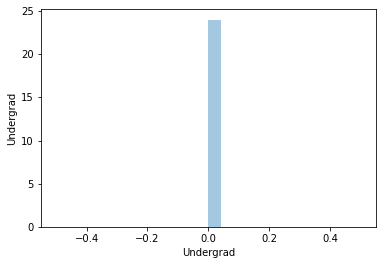

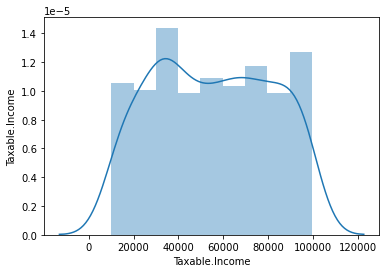

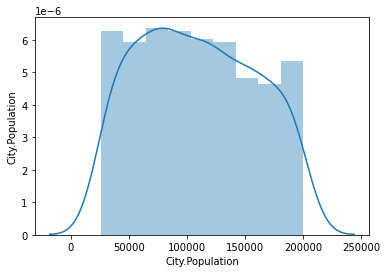

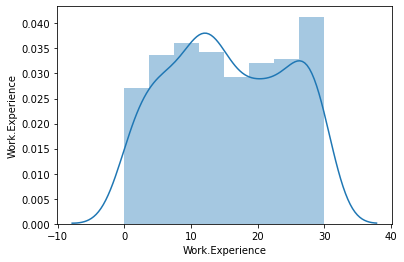

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


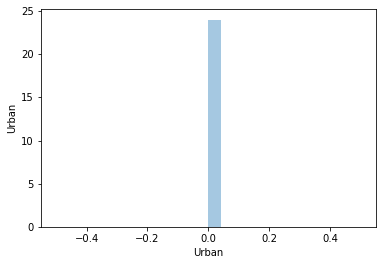

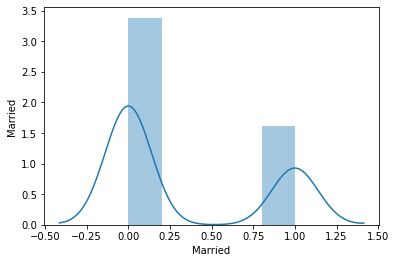

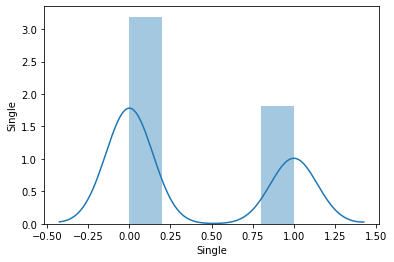

In [11]:
for i in df.columns:
    sns.distplot(df[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.show()

In [12]:
clean_data=df.copy()
clean_data['Taxable.Income']=(clean_data['Taxable.Income']>30000)*1 #if the Taxable income is greater then 30000 populate it
#with 1 else it is 0.
clean_data['Taxable.Income'].head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int32

In [13]:
y=clean_data[['Taxable.Income']].copy() #y is the target variable
y.head()

,Taxable.Income
0,1
1,1
2,1
3,1
4,1


In [14]:
df.columns

Index(['Undergrad', 'Taxable.Income', 'City.Population', 'Work.Experience',
       'Urban', 'Married', 'Single'],
      dtype='object')

In [15]:
X=df[['Undergrad', 'City.Population', 'Work.Experience',
       'Urban', 'Married', 'Single']] #Independent feature.
X.head()

,Undergrad,City.Population,Work.Experience,Urban,Married,Single
0,0,50047,10,0,0,1
1,0,134075,18,0,0,0
2,0,160205,30,0,1,0
3,0,193264,15,0,0,1
4,0,27533,28,0,1,0


# Model Training:

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #Splitting the train and the test set.

In [20]:
clf=RandomForestClassifier(n_estimators=20,max_depth=4,random_state=0) #obtaining the instance of the Decision tree classifier.
#n_estimators=20 will create a random forest of 20 decsion trees. The max_depth is chosen as 4
clf.fit(X_train,y_train) #Fitting the instance on the train and the test dataset.

<ipython-input-20-3d9937d6c751>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train) #Fitting the instance on the train and the test dataset.


RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)

In [21]:
clf.estimators_ #estimators_ will give all the decision trees in the random forest.

[DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state

In [22]:
print(clf.score(X_train,y_train)) #train accuracy
print(clf.score(X_test,y_test)) #test accuracy

0.8066666666666666
0.7533333333333333


### Unlike the Decision tree which causes the overfitting of the model , we use Random Forest which will create n different models with the records being row sampled and column sampled. This causes the model to train on different samples which will avoid overfitting.

# Visualising the Random Forest

[Text(454.57758620689657, 489.24, 'X[1] <= 140021.0\ngini = 0.312\nsamples = 281\nvalue = [87, 363]'),
 Text(230.89655172413794, 380.52000000000004, 'X[1] <= 63506.5\ngini = 0.362\nsamples = 193\nvalue = [74, 238]'),
 Text(115.44827586206897, 271.8, 'X[1] <= 39441.5\ngini = 0.176\nsamples = 66\nvalue = [11, 102]'),
 Text(57.724137931034484, 163.08000000000004, 'X[4] <= 0.5\ngini = 0.308\nsamples = 25\nvalue = [8, 34]'),
 Text(28.862068965517242, 54.360000000000014, 'gini = 0.426\nsamples = 14\nvalue = [8, 18]'),
 Text(86.58620689655173, 54.360000000000014, 'gini = 0.0\nsamples = 11\nvalue = [0, 16]'),
 Text(173.17241379310346, 163.08000000000004, 'X[2] <= 6.5\ngini = 0.081\nsamples = 41\nvalue = [3, 68]'),
 Text(144.31034482758622, 54.360000000000014, 'gini = 0.0\nsamples = 9\nvalue = [0, 21]'),
 Text(202.0344827586207, 54.360000000000014, 'gini = 0.113\nsamples = 32\nvalue = [3, 47]'),
 Text(346.3448275862069, 271.8, 'X[2] <= 10.5\ngini = 0.433\nsamples = 127\nvalue = [63, 136]'),
 Te

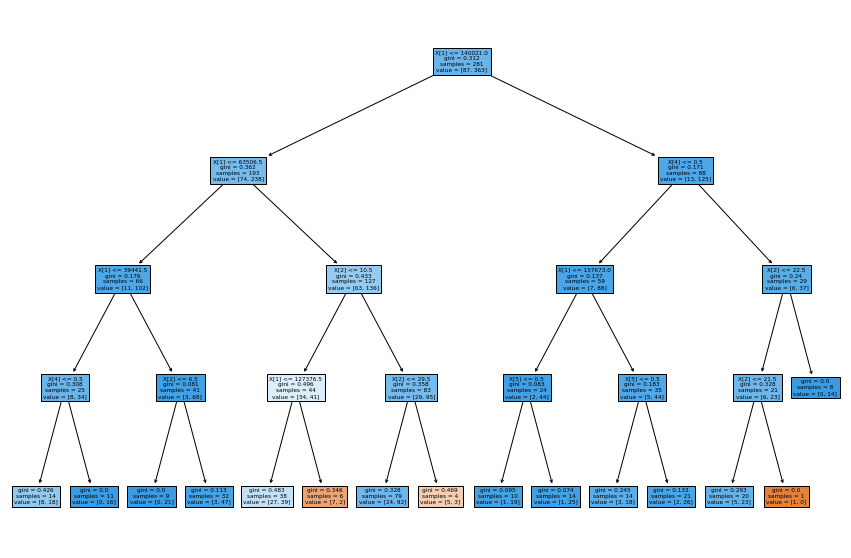

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True) #visualising the tree using plot_tree function from the module tree.
#clf.estimators_[2] will display the 3rd decision tree

# HyperParameter Tuning:

In [38]:
#No. of trees in the Random Forest:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
#No. of features to consider at every split
max_features=['auto','sqrt']
#Max no. of levels in the tree
max_depth=[2,10]
#Min. no. of samples required to split a node.
min_samples_split=[2,5]
#Min. no. of samples required at each leaf node.
min_samples_leaf=[1,2]
#Method of selecting samples for training each tree
bootstrap=[True,False]

In [39]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [40]:
clf = RandomForestClassifier() #Obtaining an instance of the RandomForestClassifier

In [41]:
rf_Grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4) #Obtaining the random search for the
#randomforestclassifier 

In [42]:
rf_Grid.fit(X_train, y_train) #fitting to the train and test data

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   32.4s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   45.4s finished
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [43]:
rf_Grid.best_params_ #Best parameters of the random search

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [34]:
print(rf_Grid.score(X_train,y_train)) #training accuracy
print(rf_Grid.score(X_test,y_test)) #test accuracy

0.8066666666666666
0.7533333333333333
